# Intro to R

As a demo of the language, plot sin and cos on the same axis:

In [1]:
# set up the default plot height and width (this is just for aesthetics)
library('repr')
options(repr.plot.width=6, repr.plot.height=5)

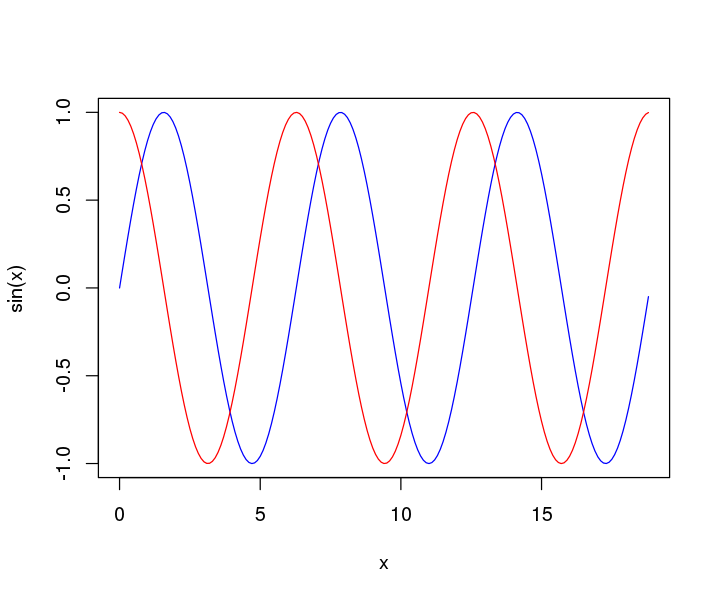

In [2]:
# define a sequence of points (start, end, by)
x = seq(0, 6*pi, 0.1)

# plot the sin of these points
plot(x, sin(x), type="l", col="blue")

# add a cos line to the plot
lines(x, cos(x), col="red")

# Netcdf

The easiest way to load and analyze NetCDF data in R involves the [ncdf4 package](https://cran.r-project.org/web/packages/ncdf4/ncdf4.pdf "ncdf4 Docs"). 

In [3]:
library('ncdf4')

data_url = 'http://hydromet-thredds.princeton.edu/thredds/dodsC/MonitoringStations/CR1000_Table1.nc'
variable = 'AirTC_Avg'

ds = nc_open(data_url)

In [4]:
AirT.data = ncvar_get(ds, variable)
AirT.units = ncatt_get(ds, variable, 'units')$value

In [5]:
time.data = ncvar_get(ds, 'time')
time.units = ncatt_get(ds, 'time', 'units')$value
print(time.units)

[1] "seconds since 1970-01-01"


In [6]:
# convert the time to a date string
time = as.POSIXct(time.data, origin="1970-01-01", tz="UTC")

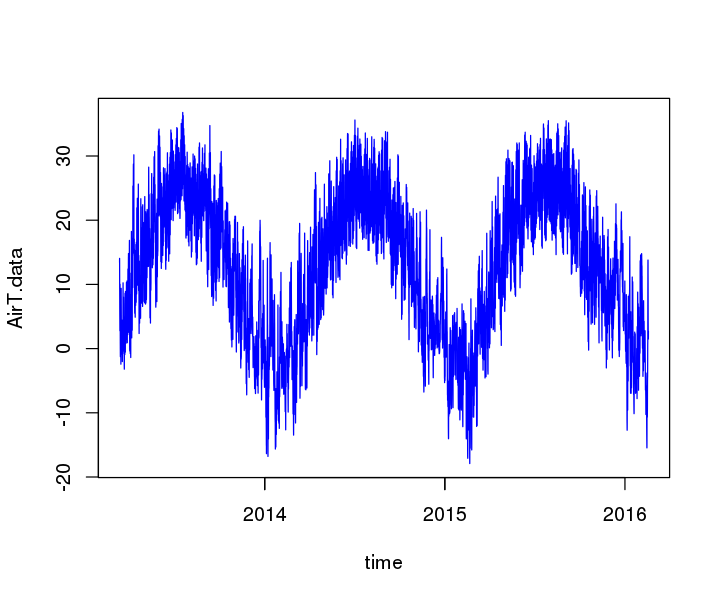

In [7]:
plot(time, AirT.data, type="l", col="blue")

## Time slices

In [8]:
options(repr.plot.width=9, repr.plot.height=4)

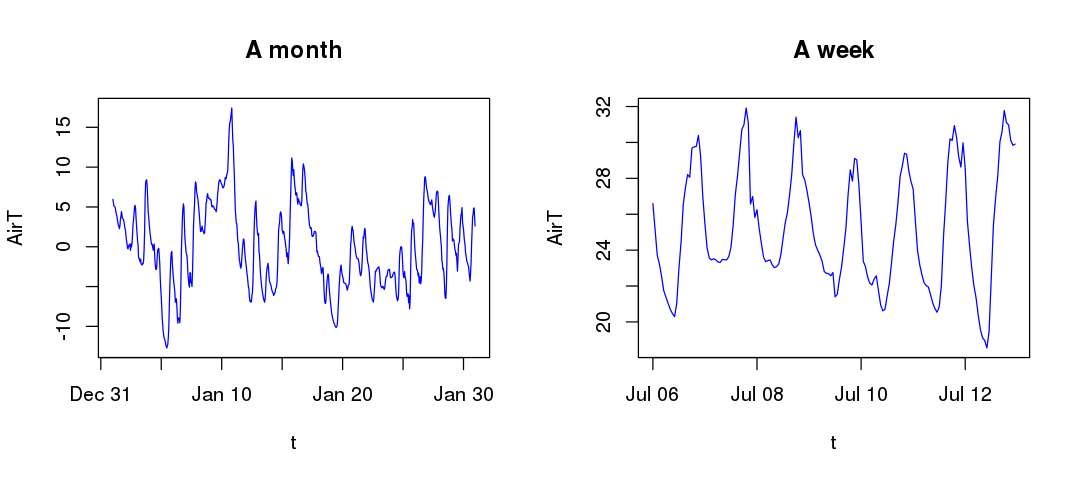

In [9]:
# find numerical indexers using timestamps
start = which(time=="2016-01-01")
count = which(time=="2016-01-31") - start

# select a slice using numerical indexers
AirT = ncvar_get(ds,variable, start, count)
t = time[start:(start+count-1)]

# define a dataframe with time as the names of the rows and air temp as the data
a_month = data.frame(t, AirT)

# do the same for a week
start = which(time=="2015-07-06 00:00:00")
count = which(time=="2015-07-13 00:00:00") - start
AirT = ncvar_get(ds,variable, start, count)
t = time[start:(start+count-1)]
a_week = data.frame(t, AirT)

# plot
layout(matrix(1:2, ncol = 2))
with(a_month, plot(AirT~t, type="l", col="blue", main='A month'))
with(a_week, plot(AirT~t, type="l", col="blue", main='A week'))

## Multiple variables

In [10]:
options(repr.plot.width=8, repr.plot.height=5)

In [11]:
start = which(time=="2015-07-06")
count = which(time=="2015-07-13") - start

Rain = ncvar_get(ds,'Rain_mm_3_Tot', start, count)
VW = ncvar_get(ds,'VW', start, count)
t = time[start:(start+count-1)]

vars_for_a_week = data.frame(t, Rain, VW)

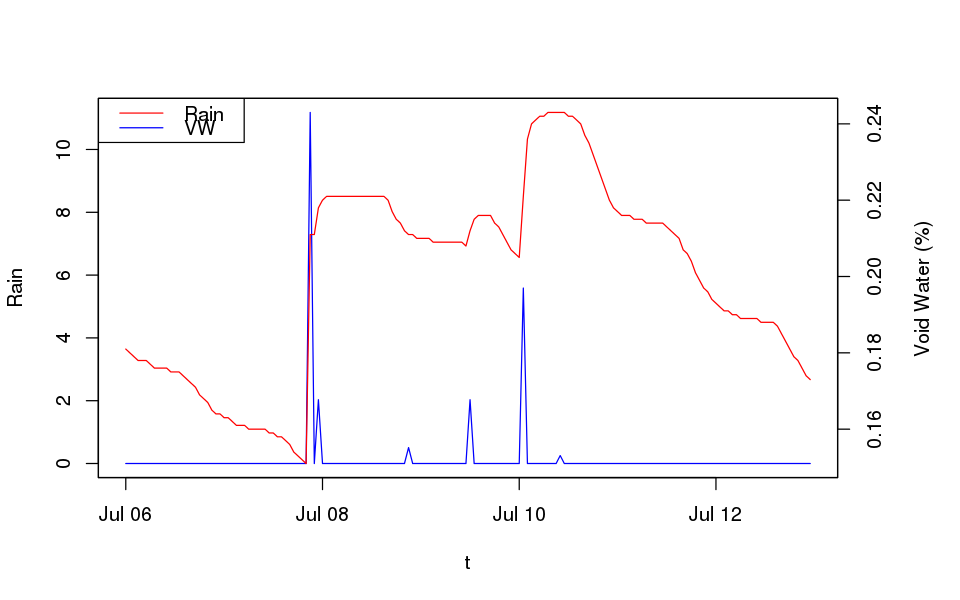

In [12]:
par(mar=c(5,4,4,5)+.1)
with(vars_for_a_week, plot(Rain~t,type="l",col="blue"))
par(new=TRUE)

with(vars_for_a_week, plot(VW~t,type="l",col="red",xaxt="n",yaxt="n",xlab="",ylab=""))
axis(4)
mtext("Void Water (%)",side=4,line=3)
legend("topleft",col=c("red","blue"),lty=1,legend=c("Rain","VW"))

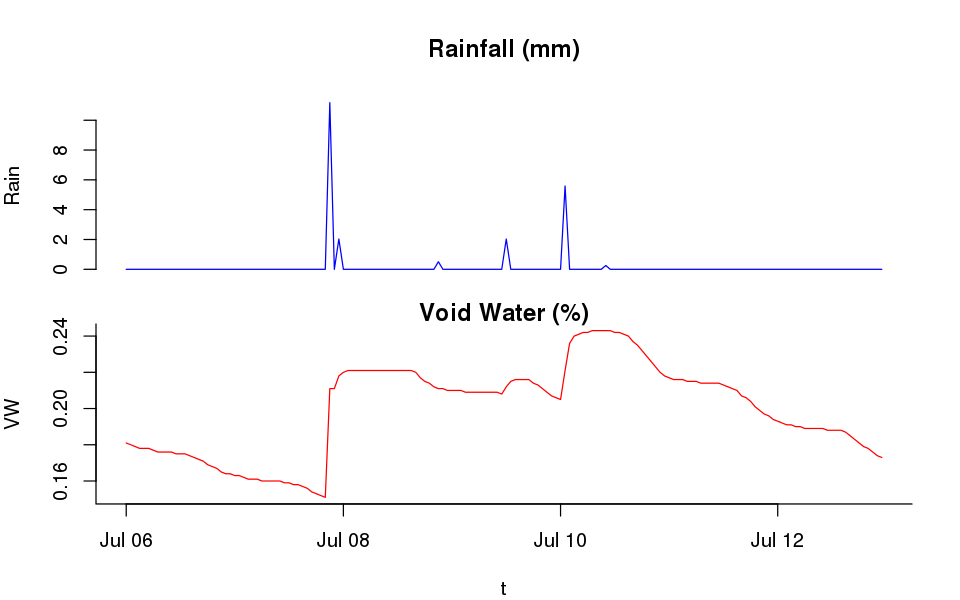

In [13]:
# 2 figures arranged in 2 rows and 1 column
layout(matrix(1:2, ncol = 1))

# set margins (bottom, left, top, right)
par(mar = c(1, 4, 4, 2))
with(vars_for_a_week, plot(Rain~t, type = 'l', col='blue', xaxt = 'n', bty="n", main = 'Rainfall (mm)'))

# set margins (bottom, left, top, right)
par(mar = c(4, 4, 1, 2))
with(vars_for_a_week, plot(VW~t, type = 'l', col='red', bty = "l", main = 'Void Water (%)'))

## Finding rainy days